<a href="https://colab.research.google.com/github/myselfkiran/Iris-flower-classification-/blob/main/stock_price_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NAME - ***A KIRAN KUMAR***
## DATA SCIENCE PROJECT-3

# PROJECT NAME - **Stock Prices Predictor**

Github Link

https://github.com/myselfkiran/Iris-flower-classification-/blob/main/Iris_ML_ipynb_txt.ipynb

#Problem Statement

This project aims to develop a stock price predictor using time series analysis. By analyzing historical stock prices, the goal is to forecast future trends using models such as moving average, exponential smoothing, and ARIMA. The project will help identify the most suitable model for accurate stock price forecasting, assisting investors in making informed decisions.

In [ ]:
# pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [ ]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-20,2.912832,3.028648,2.908349,2.972857,2.965574,213585582
2004-09-21,2.984065,2.999258,2.926780,2.934999,2.927809,145262446
2004-09-22,2.924040,2.980578,2.909345,2.948448,2.941225,152344894
2004-09-23,2.959906,3.054302,2.914575,3.009221,3.001849,171524515
2004-09-24,3.012209,3.090914,2.982820,2.984563,2.977252,183336625


In [ ]:
google_data.shape

(5034, 6)

In [ ]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,46.246296,46.734284,45.783543,46.266668,46.156364,1.146202e+08
std,44.279867,44.769439,43.844293,44.310279,44.210298,1.491977e+08
min,2.912832,2.980578,2.908349,2.934999,2.927809,1.584340e+05
25%,13.113908,13.244731,12.978105,13.120447,13.088304,2.706300e+07
50%,27.313040,27.501494,27.020066,27.290823,27.223966,5.370040e+07
75%,61.231125,61.704126,60.556688,61.026501,60.876998,1.405177e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-09-20 to 2024-09-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [ ]:
google_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

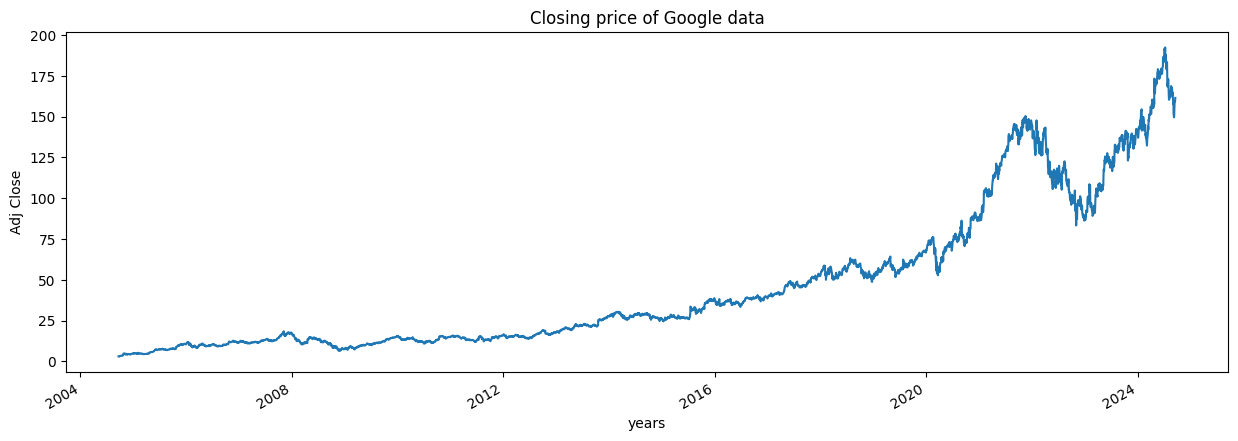

In [ ]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [ ]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [ ]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

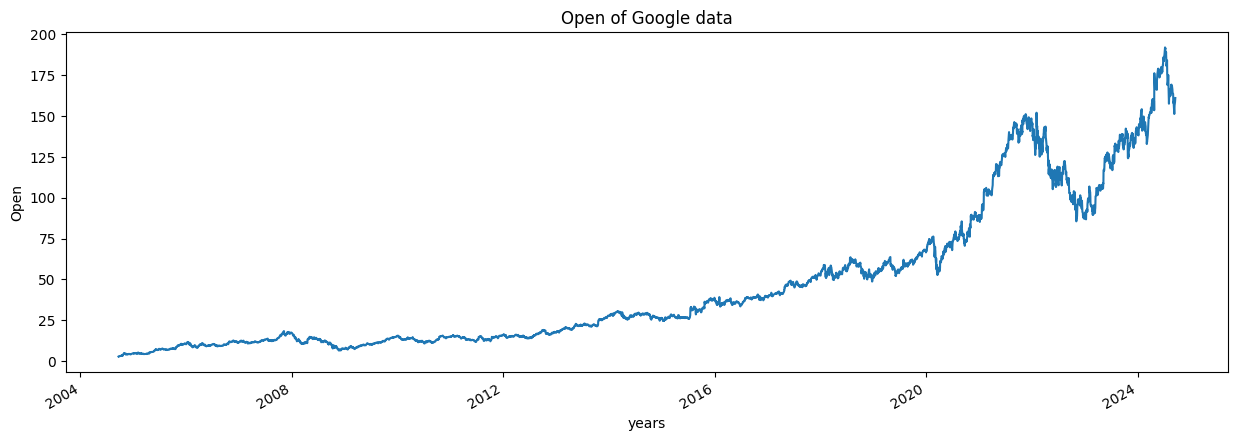

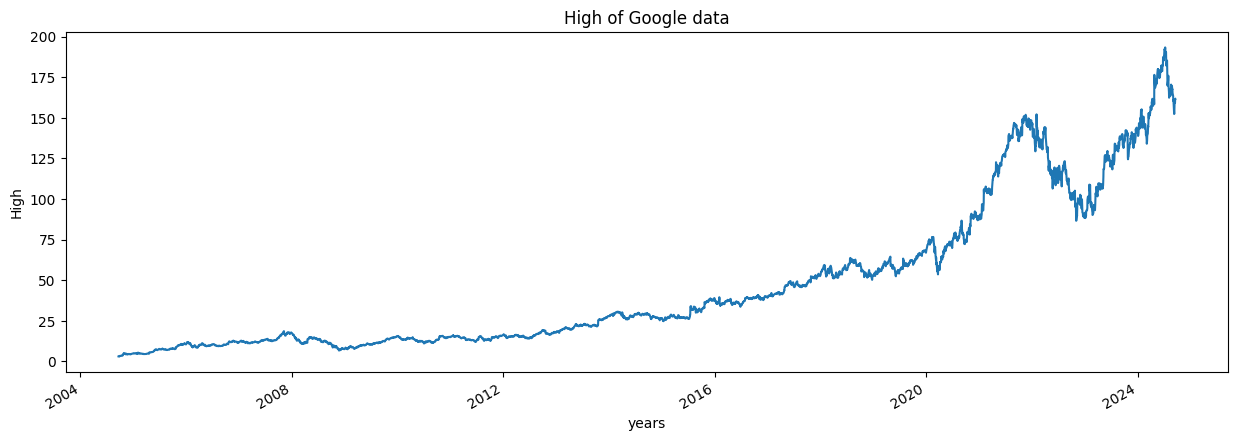

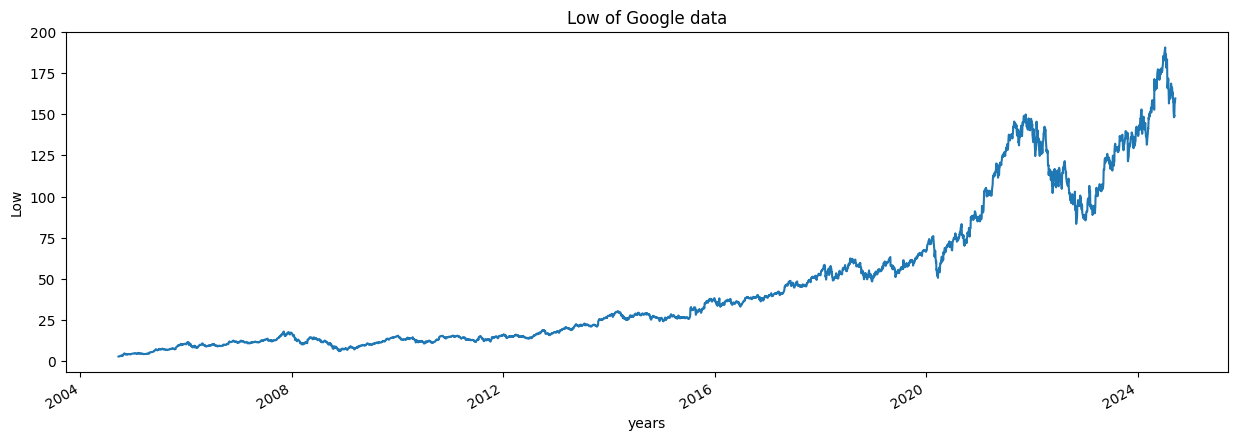

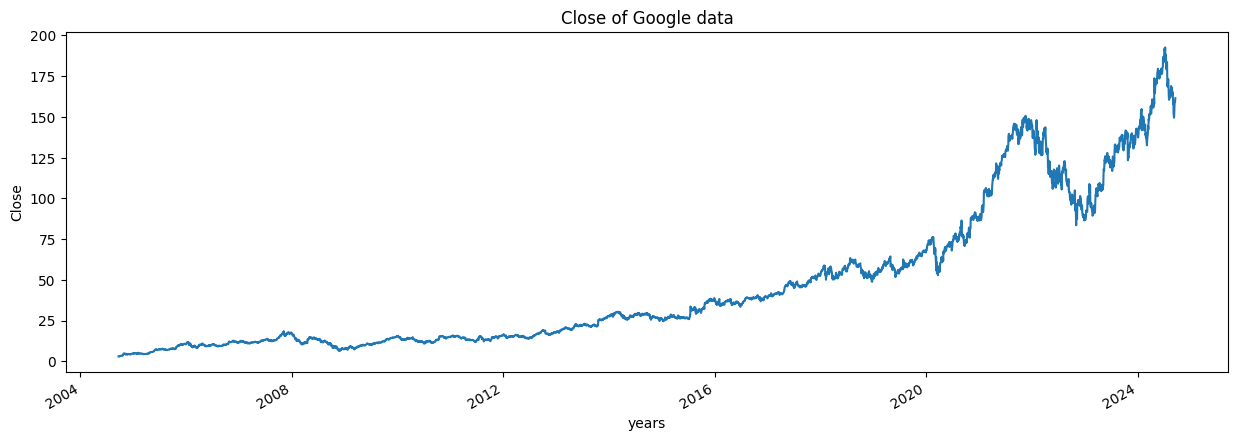

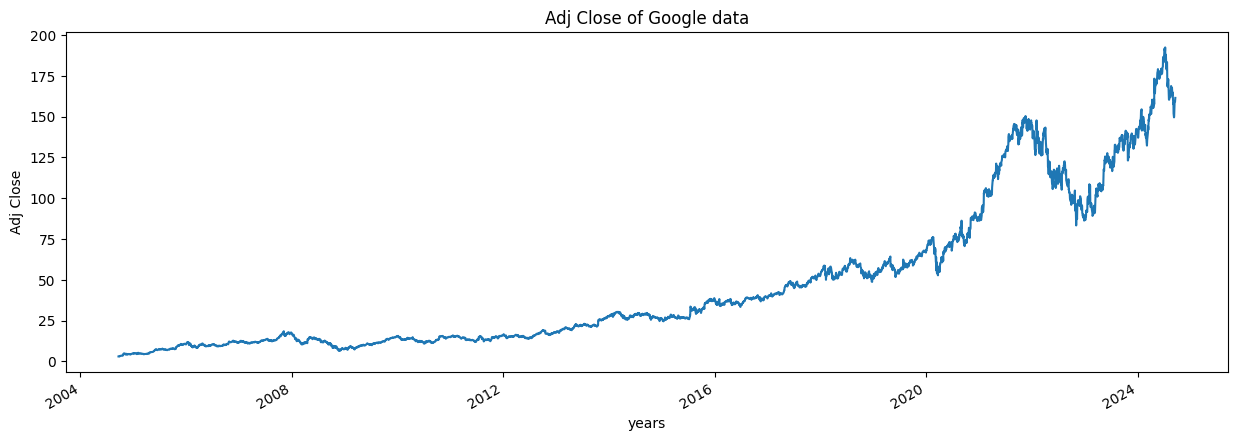

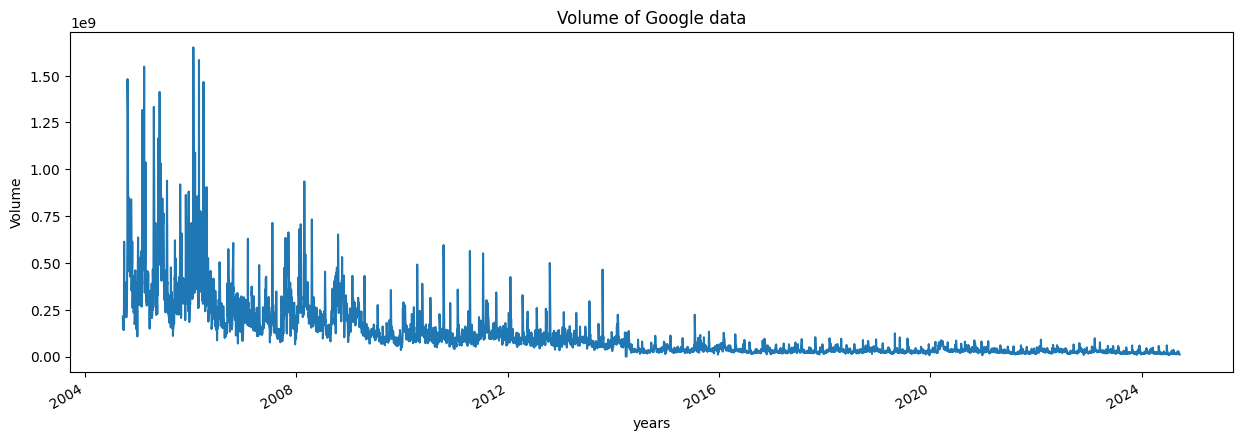

In [ ]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [ ]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [ ]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [ ]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [ ]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 73
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 180


In [ ]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [ ]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-09-08,NaN
2005-09-09,NaN
2005-09-12,NaN
2005-09-13,NaN
2005-09-14,5.404058


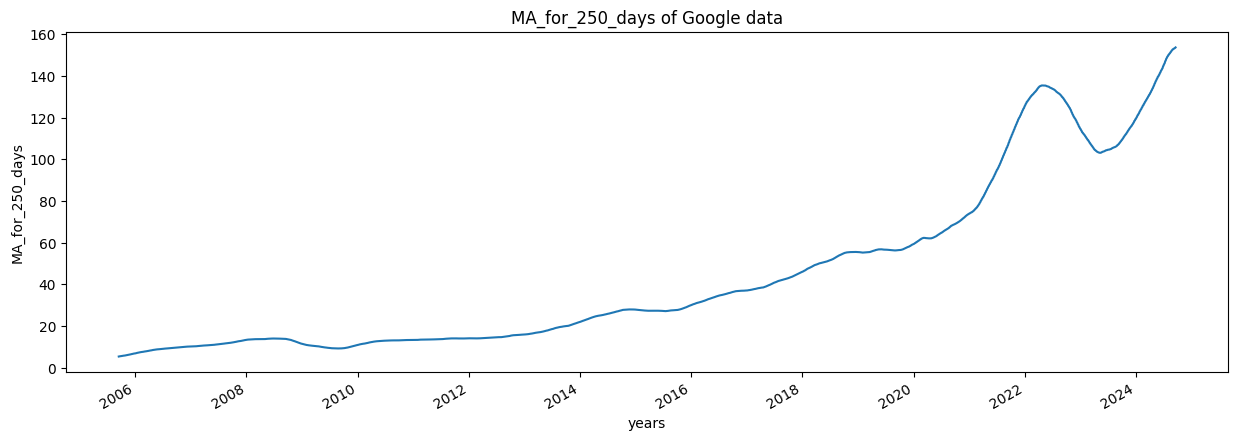

In [ ]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

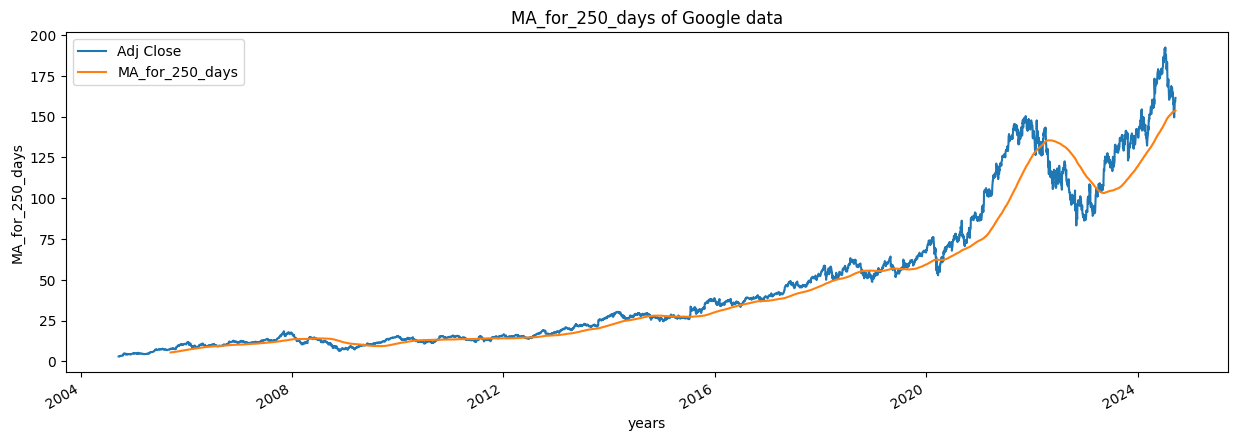

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

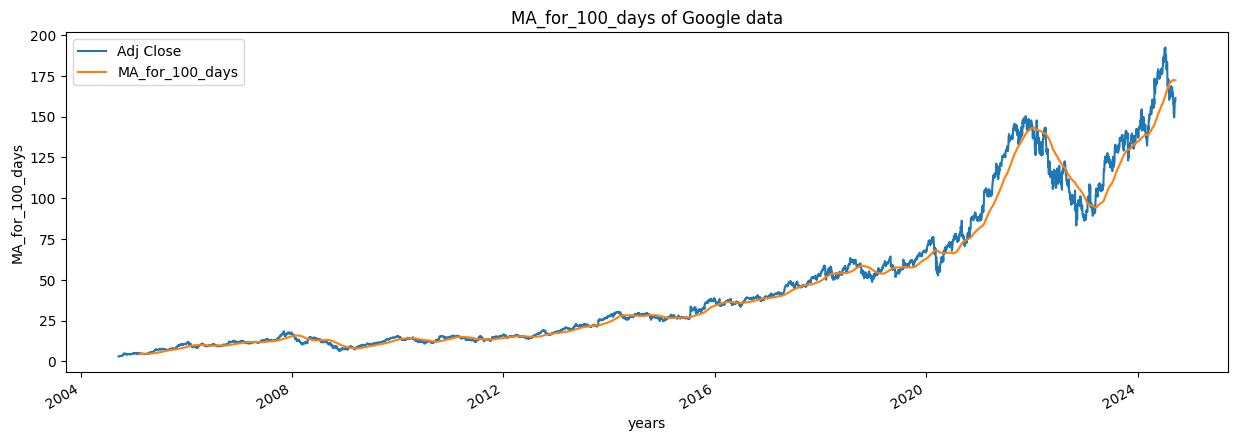

In [ ]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

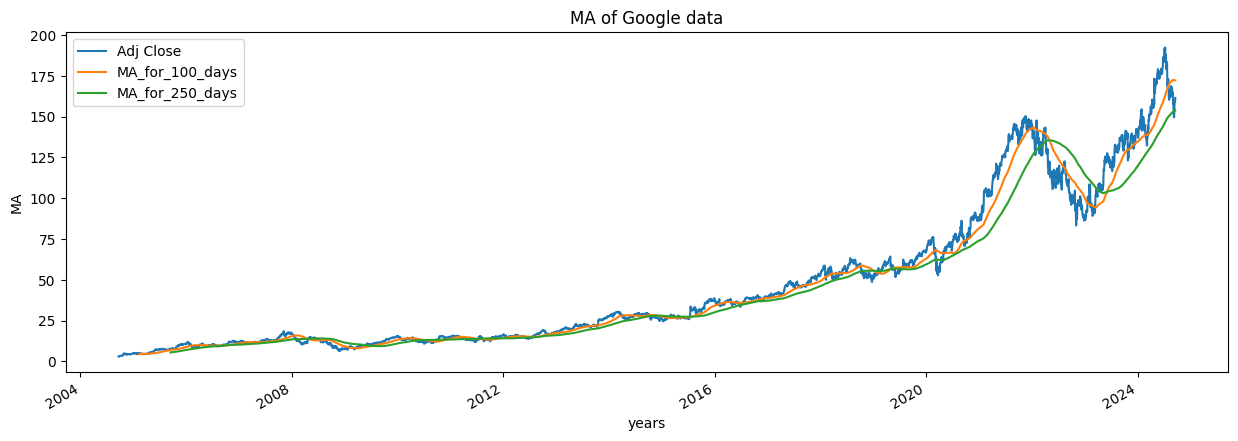

In [ ]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [ ]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-09-20,2.965574,NaN
2004-09-21,2.927809,-0.012735
2004-09-22,2.941225,0.004582
2004-09-23,3.001849,0.020612
2004-09-24,2.977252,-0.008194


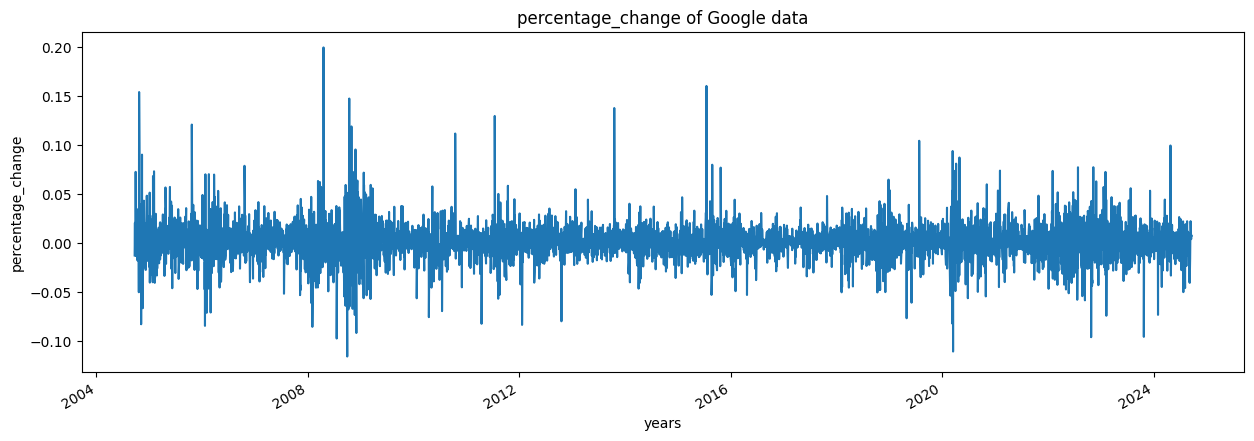

In [ ]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [ ]:
Adj_close_price = google_data[['Adj Close']]

In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([2.92780876]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[1.99311172e-04],
       [0.00000000e+00],
       [7.08049860e-05],
       ...,
       [8.23638859e-01],
       [8.30446969e-01],
       [8.36727364e-01]])

In [ ]:
len(scaled_data)

5034

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[1.99311172e-04],
        [0.00000000e+00],
        [7.08049860e-05],
        [3.90758060e-04],
        [2.60940740e-04],
        [5.50751584e-05],
        [1.18275696e-03],
        [1.73611067e-03],
        [1.54204278e-03],
        [1.93279958e-03],
        [2.25798964e-03],
        [2.69201762e-03],
        [2.52286629e-03],
        [2.75495706e-03],
        [2.60809752e-03],
        [2.28421734e-03],
        [2.56482760e-03],
        [3.02376586e-03],
        [3.16800439e-03],
        [3.44467999e-03],
        [4.10686786e-03],
        [3.94689573e-03],
        [2.97000435e-03],
        [4.13571406e-03],
        [7.15817508e-03],
        [9.12112821e-03],
        [8.38682297e-03],
        [8.93362102e-03],
        [9.89477502e-03],
        [9.54597826e-03],
        [1.02527447e-02],
        [1.01006431e-02],
        [9.68103508e-03],
        [8.76708944e-03],
        [6.75430065e-03],
        [7.17390365e-03],
        [6.66907445e-03],
        [6.55892665e-03],
        [8.5

In [ ]:

int(len(x_data)*0.7)

3453

In [ ]:
4908-100-int(len(x_data)*0.7)

1355

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 287s 82ms/step - loss: 2.3040e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 314s 80ms/step - loss: 6.7126e-05


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

46/46 [==============================] - 7s 79ms/step


In [ ]:
predictions

array([[0.346481  ],
       [0.3471811 ],
       [0.34669545],
       ...,
       [0.9589185 ],
       [0.9565912 ],
       [0.94491225]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 55.276974],
       [ 55.383636],
       [ 55.309647],
       ...,
       [148.58127 ],
       [148.2267  ],
       [146.44743 ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 53.9620018 ],
       [ 53.78300095],
       [ 53.01599884],
       ...,
       [147.13999939],
       [143.94000244],
       [141.75999451]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

2.6333577251768654

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-05-24,53.962002,55.276974
2018-05-25,53.783001,55.383636
2018-05-29,53.015999,55.309647
2018-05-30,53.389999,54.820251
2018-05-31,54.249500,54.759434


<Figure size 640x480 with 0 Axes>

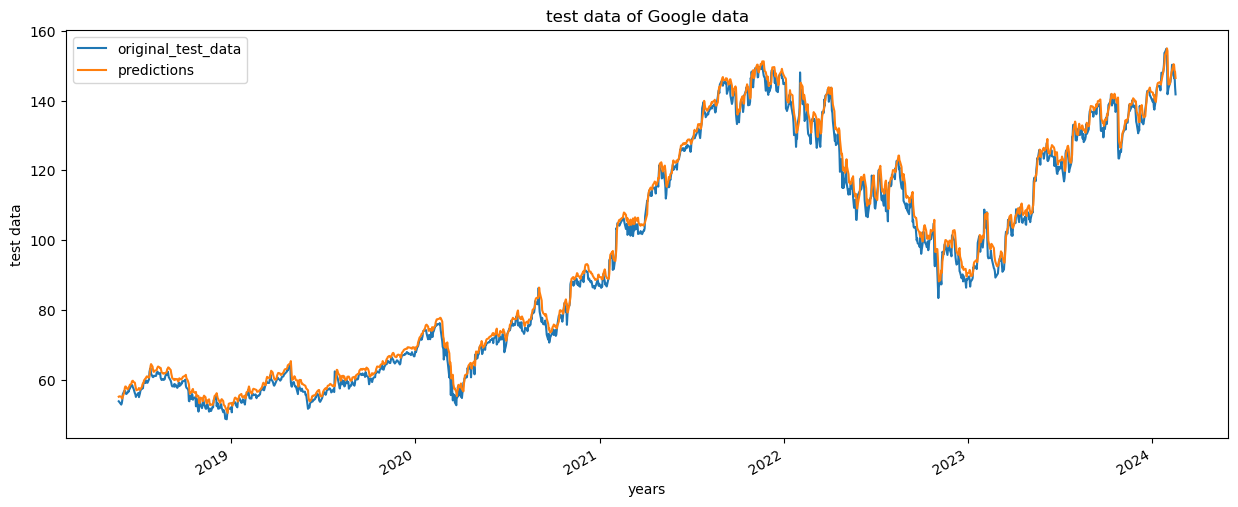

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

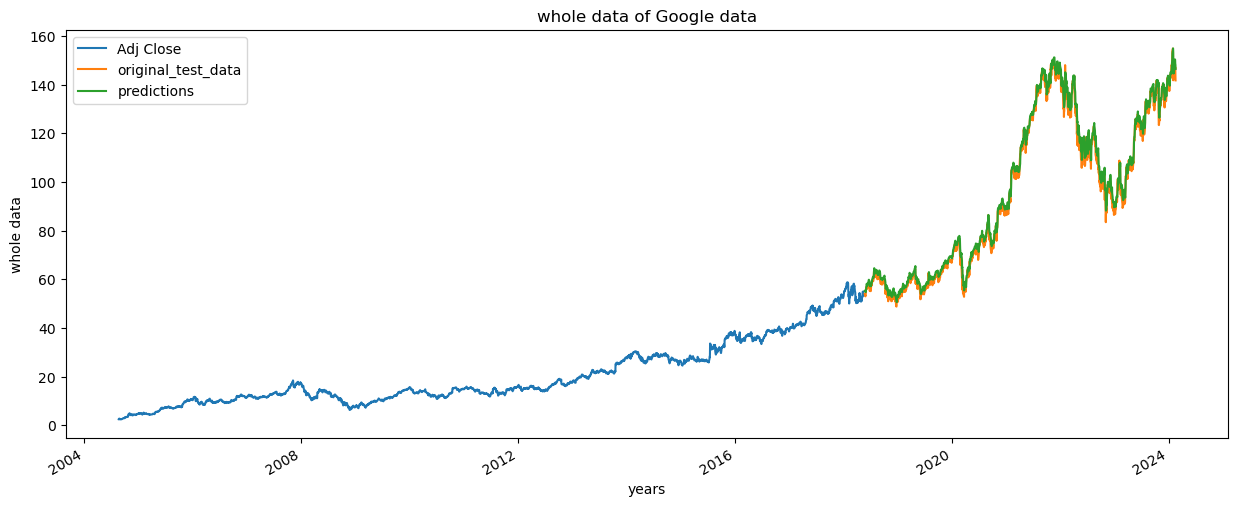

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")